In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## Loading our csv dataset & describe some information about this dataset

In [2]:
data = pd.read_csv("Human_Resources.csv")

In [3]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [6]:
# print the unique values of columns which are the number of unique values of that column is less or equal to 30 (ordinal columns)

for column in data.columns:
    if len(data[column].unique()) <= 30:
        print(column)

        for element in data[column].unique():
            print(f"\t{element}")

        print("\n")

Attrition
	Yes
	No


BusinessTravel
	Travel_Rarely
	Travel_Frequently
	Non-Travel


Department
	Sales
	Research & Development
	Human Resources


DistanceFromHome
	1
	8
	2
	3
	24
	23
	27
	16
	15
	26
	19
	21
	5
	11
	9
	7
	6
	10
	4
	25
	12
	18
	29
	22
	14
	20
	28
	17
	13


Education
	2
	1
	4
	3
	5


EducationField
	Life Sciences
	Other
	Medical
	Marketing
	Technical Degree
	Human Resources


EmployeeCount
	1


EnvironmentSatisfaction
	2
	3
	4
	1


Gender
	Female
	Male


JobInvolvement
	3
	2
	4
	1


JobLevel
	2
	1
	3
	4
	5


JobRole
	Sales Executive
	Research Scientist
	Laboratory Technician
	Manufacturing Director
	Healthcare Representative
	Manager
	Sales Representative
	Research Director
	Human Resources


JobSatisfaction
	4
	2
	3
	1


MaritalStatus
	Single
	Married
	Divorced


NumCompaniesWorked
	8
	1
	6
	9
	0
	4
	5
	2
	7
	3


Over18
	Y


OverTime
	Yes
	No


PercentSalaryHike
	11
	23
	15
	12
	13
	20
	22
	21
	17
	14
	16
	18
	19
	24
	25


PerformanceRating
	3
	4


RelationshipSatisfactio

<Axes: >

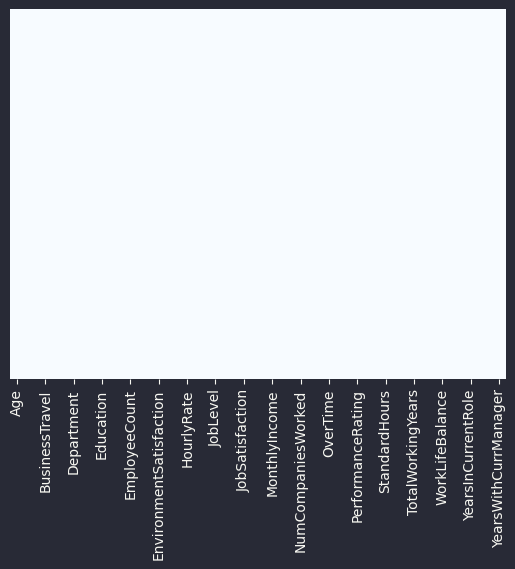

In [8]:
# use some method to see there is any null value in our dataset
# the first method is to use the heatmap, if there is any null in our dataset, the heatmap will show us
# as you see, there is no blue color in our plot, it's means that there are not any null value in this dataset
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [7]:
# another way to do that, is to use the .isnull() method of pandas dataframe and print the number of null values of each column
# as you see now and saw before, there is no any null value
for col in data.columns:
    print(f"number of null value of {col} is : {data[col].isnull().sum()}")

number of null value of Age is : 0
number of null value of Attrition is : 0
number of null value of BusinessTravel is : 0
number of null value of DailyRate is : 0
number of null value of Department is : 0
number of null value of DistanceFromHome is : 0
number of null value of Education is : 0
number of null value of EducationField is : 0
number of null value of EmployeeCount is : 0
number of null value of EmployeeNumber is : 0
number of null value of EnvironmentSatisfaction is : 0
number of null value of Gender is : 0
number of null value of HourlyRate is : 0
number of null value of JobInvolvement is : 0
number of null value of JobLevel is : 0
number of null value of JobRole is : 0
number of null value of JobSatisfaction is : 0
number of null value of MaritalStatus is : 0
number of null value of MonthlyIncome is : 0
number of null value of MonthlyRate is : 0
number of null value of NumCompaniesWorked is : 0
number of null value of Over18 is : 0
number of null value of OverTime is : 0
n

In [8]:
# convert our Attrition values from "Yes" and "No" into 1 and 0
data["Attrition"] = data["Attrition"].apply(lambda x:1 if x == "Yes" else 0)

In [9]:
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [10]:
# the Over18 column is fixed to "Y", so we can just drop that column, we have some fixed value column, we would drop them later
data.drop(["Over18"], axis=1, inplace=True)

In [11]:
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 34 columns]

# Data Visualizing

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: titl

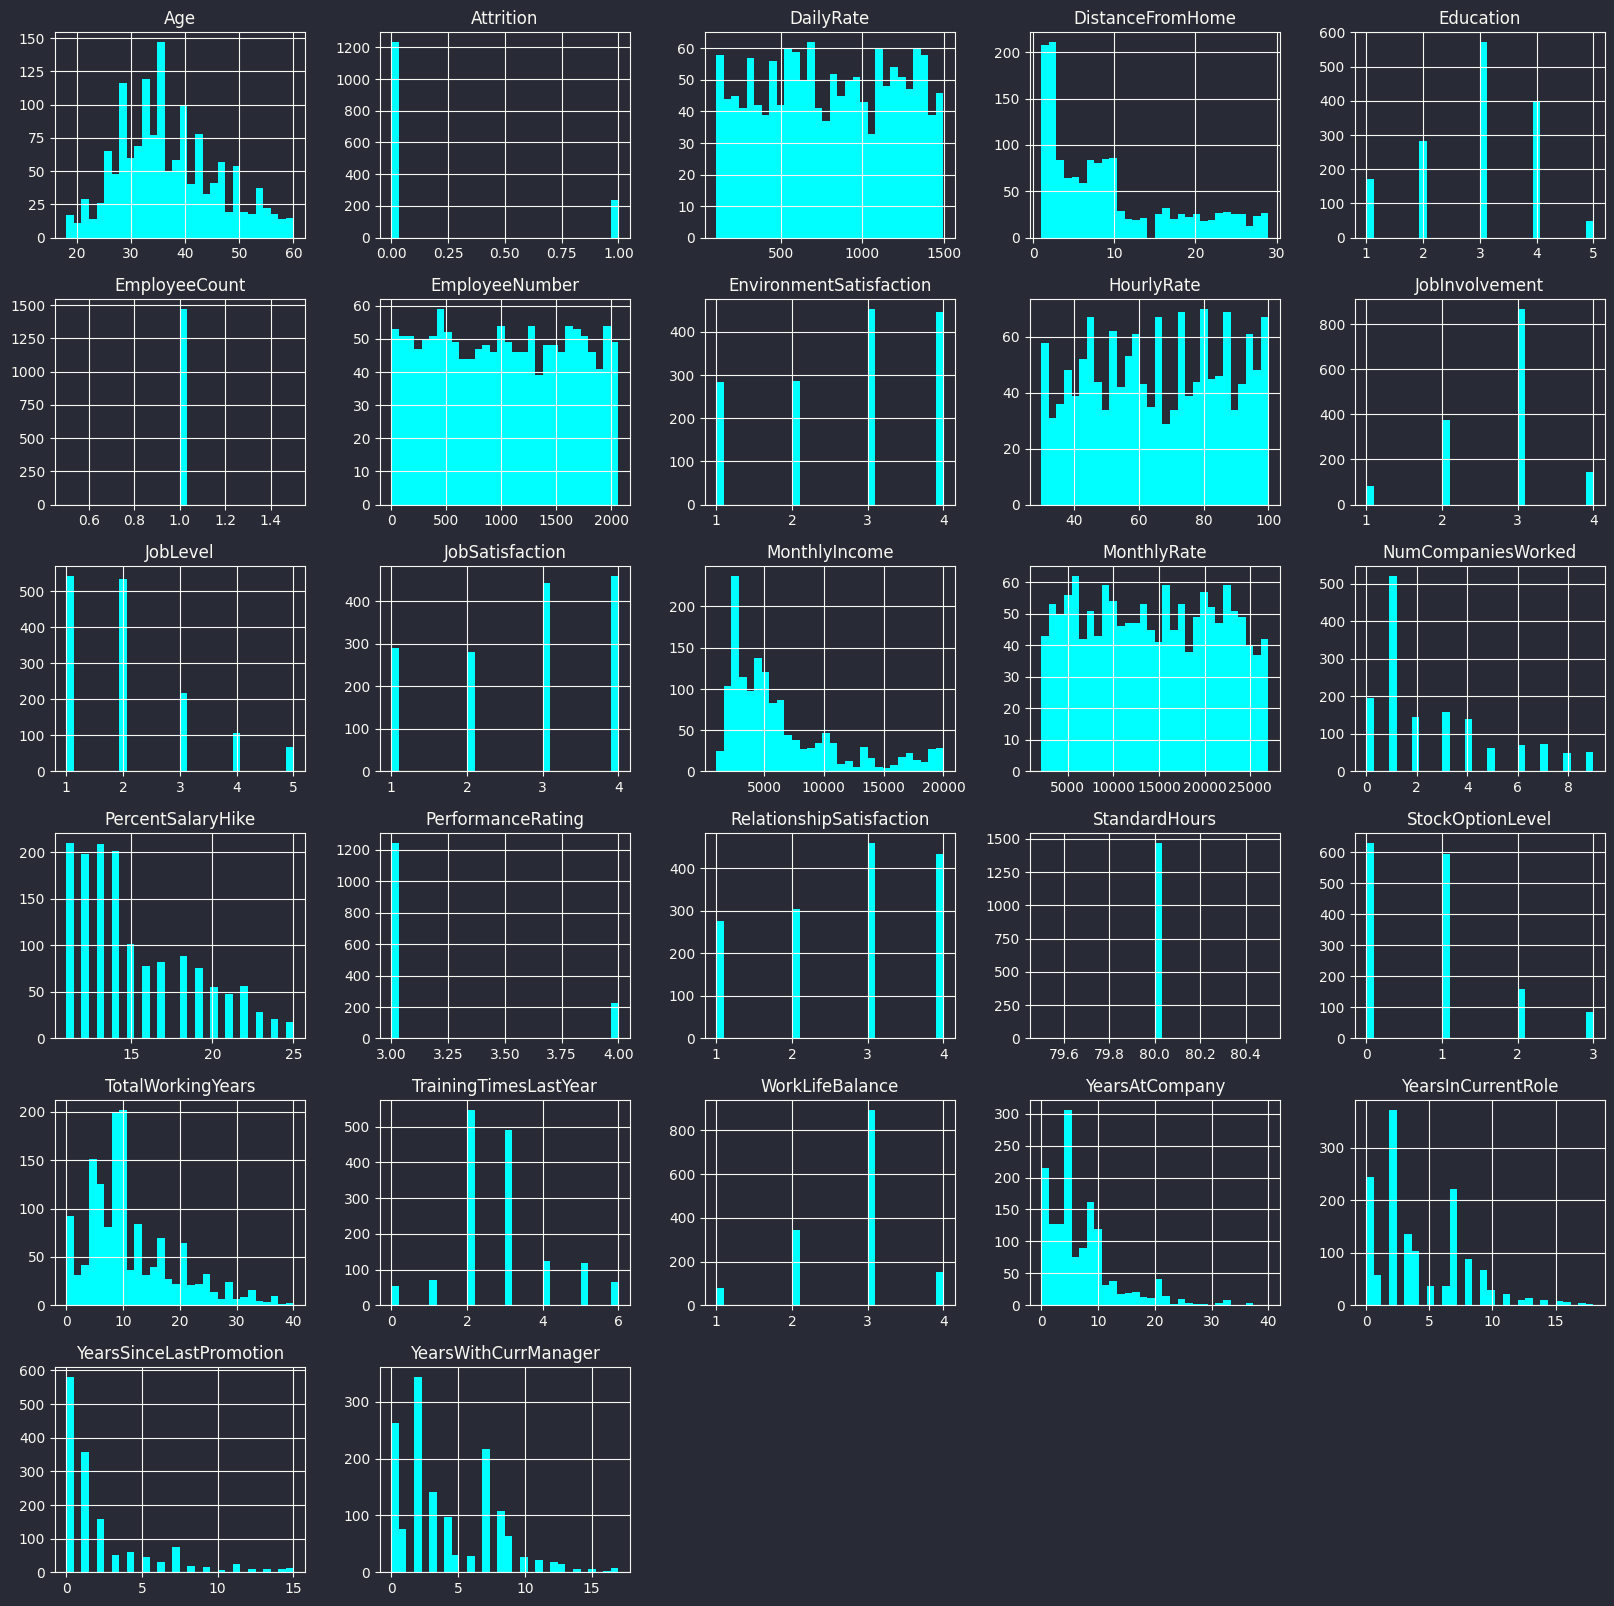

In [15]:
# we have to do some data visualizing
data.hist(bins=30, figsize=(20, 20), color="cyan")

In [16]:
# it's obvious from our histogram plot that our "StandardHours" and "EmployeeCount" are just two fixed value columns, so we have to drop them
data.drop(["StandardHours", "EmployeeCount"], axis=1, inplace=True)

In [17]:
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

In [18]:
# i used a function to do some scatter plot and analysed them
def scatters(data, h=None, pal=None):                
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8,1, figsize=(15,25))
    sns.scatterplot(x="MonthlyIncome",y="Age", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="DistanceFromHome",y="TotalWorkingYears", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="DistanceFromHome",y="YearsAtCompany", hue=h, palette=pal, data=data, ax=ax3)
    sns.scatterplot(x="HourlyRate",y="JobRole", hue=h, palette=pal, data=data, ax=ax4)
    sns.scatterplot(x="HourlyRate",y="MonthlyIncome", hue=h, palette=pal, data=data, ax=ax5)
    sns.scatterplot(x="TotalWorkingYears",y="YearsAtCompany", hue=h, palette=pal, data=data, ax=ax6)
    sns.scatterplot(x="TotalWorkingYears",y="Age", hue=h, palette=pal, data=data, ax=ax7)
    sns.scatterplot(x="TotalWorkingYears",y="DailyRate", hue=h, palette=pal, data=data, ax=ax8)
    plt.tight_layout()

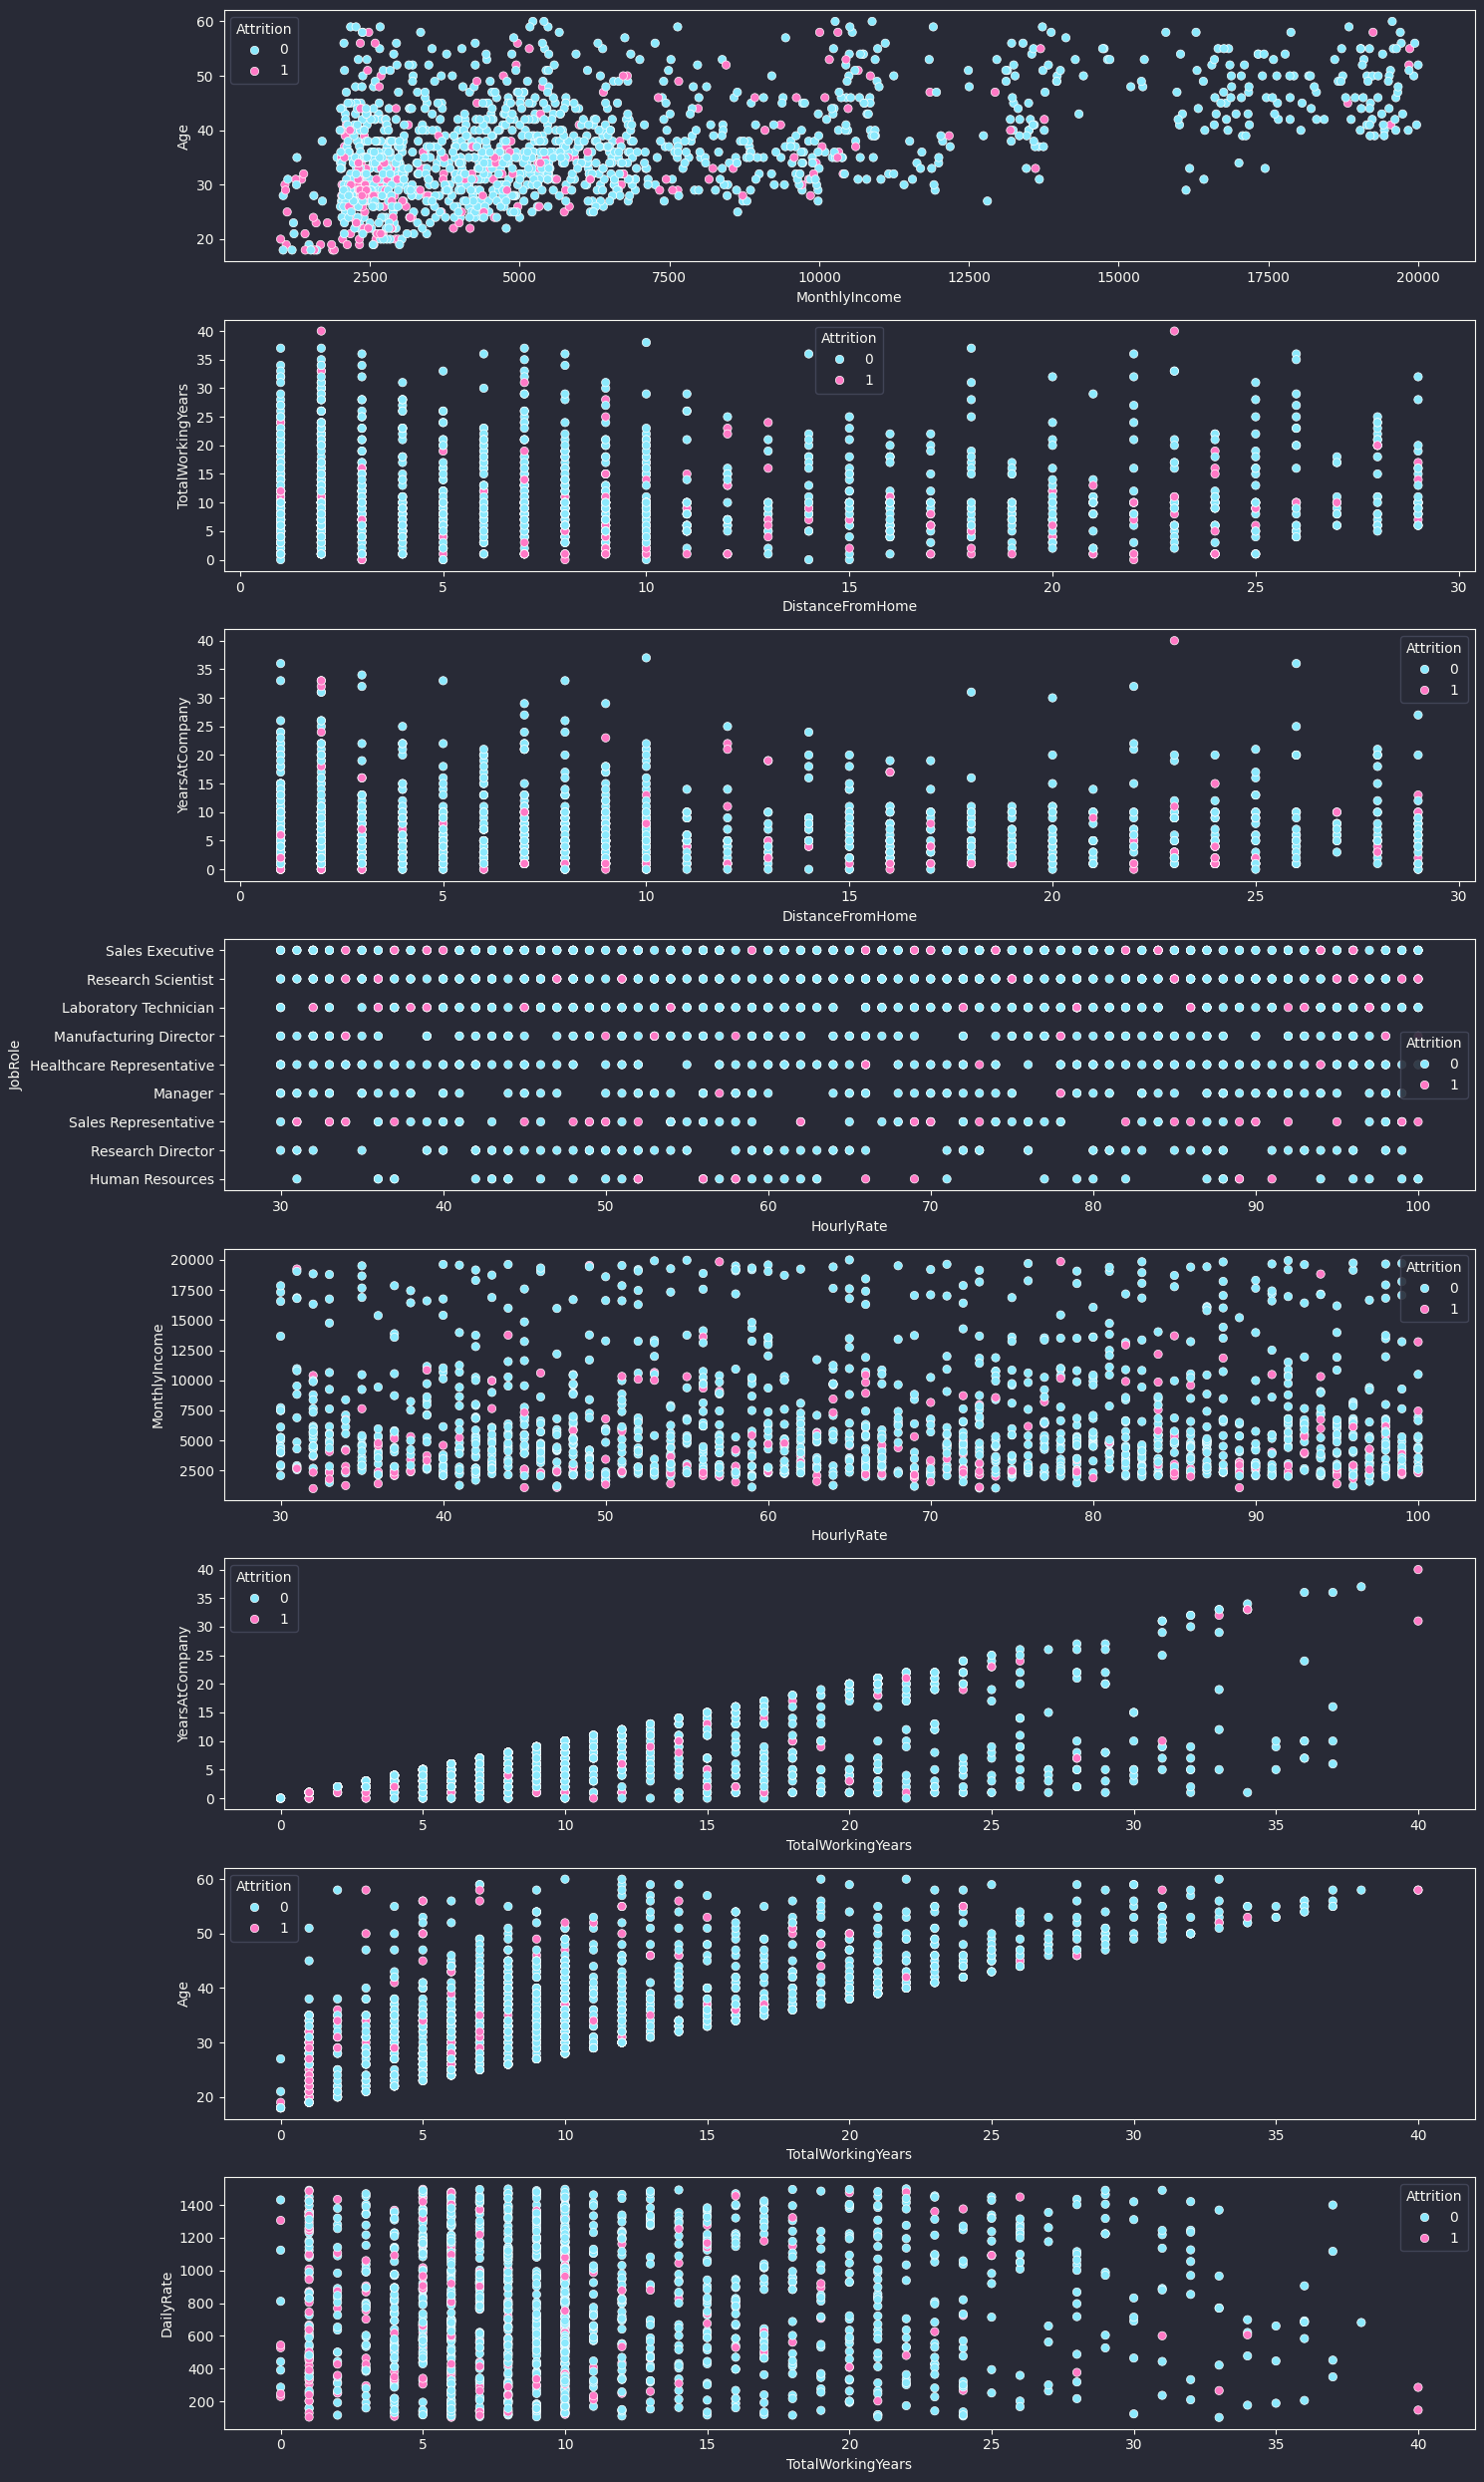

In [19]:
# there is a pretty obvious correlation between the "Age" and "MonthlyIncome"
scatters(data, "Attrition")

(array([1233.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         237.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

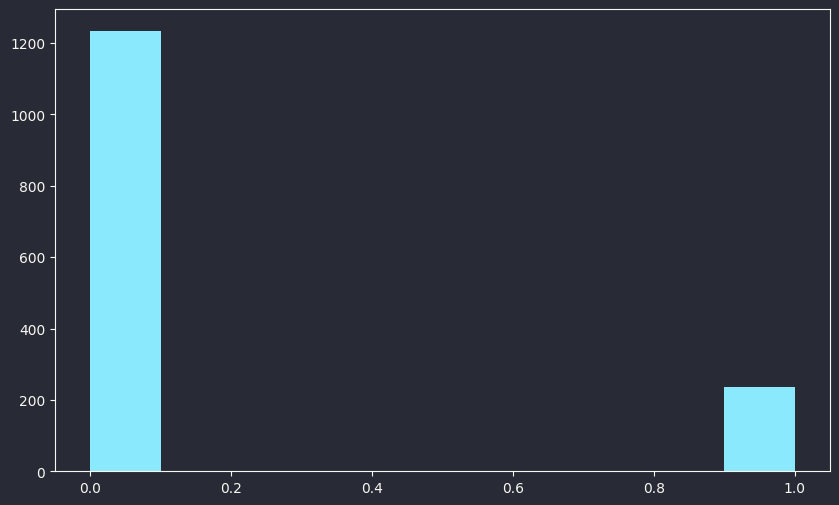

In [20]:
# plot the countplot of "Attrition" to compere the number of the employees who left and who stayed
plt.figure(figsize=(10,6))
plt.hist(data["Attrition"])

In [21]:
# let's splite the dataset into two different dataframe for the employees who left the company and who stayed in company
left_df = data[data["Attrition"] == 1]
stayed_df = data[data["Attrition"] == 0]

In [22]:
# as you can see, the average Age of the employees who left the company is less than the one who stayed
# also we can see the Distance From Home of the employees who left is more than the one who stayed
# the Monthly Income of the left employees are also very less than the stayed employees
left_df.describe().T

count          mean          std     min     25%  \
Age                       237.0     33.607595     9.689350    18.0    28.0   
Attrition                 237.0      1.000000     0.000000     1.0     1.0   
DailyRate                 237.0    750.362869   401.899519   103.0   408.0   
DistanceFromHome          237.0     10.632911     8.452525     1.0     3.0   
Education                 237.0      2.839662     1.008244     1.0     2.0   
EmployeeNumber            237.0   1010.345992   580.750572     1.0   514.0   
EnvironmentSatisfaction   237.0      2.464135     1.169791     1.0     1.0   
HourlyRate                237.0     65.573840    20.099958    31.0    50.0   
JobInvolvement            237.0      2.518987     0.773405     1.0     2.0   
JobLevel                  237.0      1.637131     0.940594     1.0     1.0   
JobSatisfaction           237.0      2.468354     1.118058     1.0     1.0   
MonthlyIncome             237.0   4787.092827  3640.210367  1009.0  2373.0   
MonthlyRate               237.0  14559.308017  7208.153264  2326.0  8870.0   
NumCompaniesWorked        237.0      2.940928     2.678519     0.0     1.0   
PercentSalaryHike         237.0     15.097046     3.770294    11.0    12.0   
PerformanceRating         237.0      3.156118     0.363735     3.0     3.0   
RelationshipSatisfaction  237.0      2.599156     1.125437     1.0     2.0   
StockOptionLevel          237.0      0.527426     0.856361     0.0     0.0   
TotalWorkingYears         237.0      8.244726     7.169204     0.0     3.0   
TrainingTimesLastYear     237.0      2.624473     1.254784     0.0     2.0   
WorkLifeBalance           237.0      2.658228     0.816453     1.0     2.0   
YearsAtCompany            237.0      5.130802     5.949984     0.0     1.0   
YearsInCurrentRole        237.0      2.902954     3.174827     0.0     0.0   
YearsSinceLastPromotion   237.0      1.945148     3.153077     0.0     0.0   
YearsWithCurrManager      237.0      2.852321     3.143349     0.0     0.0   

                              50%      75%      max  
Age                          32.0     39.0     58.0  
Attrition                     1.0      1.0      1.0  
DailyRate                   699.0   1092.0   1496.0  
DistanceFromHome              9.0     17.0     29.0  
Education                     3.0      4.0      5.0  
EmployeeNumber             1017.0   1486.0   2055.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   66.0     84.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      1.0      2.0      5.0  
JobSatisfaction               3.0      3.0      4.0  
MonthlyIncome              3202.0   5916.0  19859.0  
MonthlyRate               14618.0  21081.0  26999.0  
NumCompaniesWorked            1.0      5.0      9.0  
PercentSalaryHike            14.0     17.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StockOptionLevel              0.0      1.0      3.0  
TotalWorkingYears             7.0     10.0     40.0  
TrainingTimesLastYear         2.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                3.0      7.0     40.0  
YearsInCurrentRole            2.0      4.0     15.0  
YearsSinceLastPromotion       1.0      2.0     15.0  
YearsWithCurrManager          2.0      5.0     14.0

In [23]:
stayed_df.describe().T

count          mean          std     min     25%  \
Age                       1233.0     37.561233     8.888360    18.0    31.0   
Attrition                 1233.0      0.000000     0.000000     0.0     0.0   
DailyRate                 1233.0    812.504461   403.208379   102.0   477.0   
DistanceFromHome          1233.0      8.915653     8.012633     1.0     2.0   
Education                 1233.0      2.927007     1.027002     1.0     2.0   
EmployeeNumber            1233.0   1027.656123   606.217074     2.0   483.0   
EnvironmentSatisfaction   1233.0      2.771290     1.071132     1.0     2.0   
HourlyRate                1233.0     65.952149    20.380754    30.0    48.0   
JobInvolvement            1233.0      2.770479     0.692050     1.0     2.0   
JobLevel                  1233.0      2.145985     1.117933     1.0     1.0   
JobSatisfaction           1233.0      2.778589     1.093277     1.0     2.0   
MonthlyIncome             1233.0   6832.739659  4818.208001  1051.0  3211.0   
MonthlyRate               1233.0  14265.779400  7102.260749  2094.0  7973.0   
NumCompaniesWorked        1233.0      2.645580     2.460090     0.0     1.0   
PercentSalaryHike         1233.0     15.231144     3.639511    11.0    12.0   
PerformanceRating         1233.0      3.153285     0.360408     3.0     3.0   
RelationshipSatisfaction  1233.0      2.733982     1.071603     1.0     2.0   
StockOptionLevel          1233.0      0.845093     0.841985     0.0     0.0   
TotalWorkingYears         1233.0     11.862936     7.760719     0.0     6.0   
TrainingTimesLastYear     1233.0      2.832928     1.293585     0.0     2.0   
WorkLifeBalance           1233.0      2.781022     0.681907     1.0     2.0   
YearsAtCompany            1233.0      7.369019     6.096298     0.0     3.0   
YearsInCurrentRole        1233.0      4.484185     3.649402     0.0     2.0   
YearsSinceLastPromotion   1233.0      2.234388     3.234762     0.0     0.0   
YearsWithCurrManager      1233.0      4.367397     3.594116     0.0     2.0   

                              50%      75%      max  
Age                          36.0     43.0     60.0  
Attrition                     0.0      0.0      0.0  
DailyRate                   817.0   1176.0   1499.0  
DistanceFromHome              7.0     13.0     29.0  
Education                     3.0      4.0      5.0  
EmployeeNumber             1022.0   1574.0   2068.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   66.0     83.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      2.0      3.0      5.0  
JobSatisfaction               3.0      4.0      4.0  
MonthlyIncome              5204.0   8834.0  19999.0  
MonthlyRate               14120.0  20364.0  26997.0  
NumCompaniesWorked            2.0      4.0      9.0  
PercentSalaryHike            14.0     18.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StockOptionLevel              1.0      1.0      3.0  
TotalWorkingYears            10.0     16.0     38.0  
TrainingTimesLastYear         3.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                6.0     10.0     37.0  
YearsInCurrentRole            3.0      7.0     18.0  
YearsSinceLastPromotion       1.0      3.0     15.0  
YearsWithCurrManager          3.0      7.0     17.0

In [24]:
print(f"number of employees that left the company is : {len(left_df)}")
print(f"number of employees that stayed in the company is : {len(stayed_df)}")
print((len(left_df) / len(data)) * 100)
print((len(stayed_df) / len(data)) * 100)

number of employees that left the company is : 237
number of employees that stayed in the company is : 1233
16.122448979591837
83.87755102040816


<Axes: xlabel='Age', ylabel='count'>

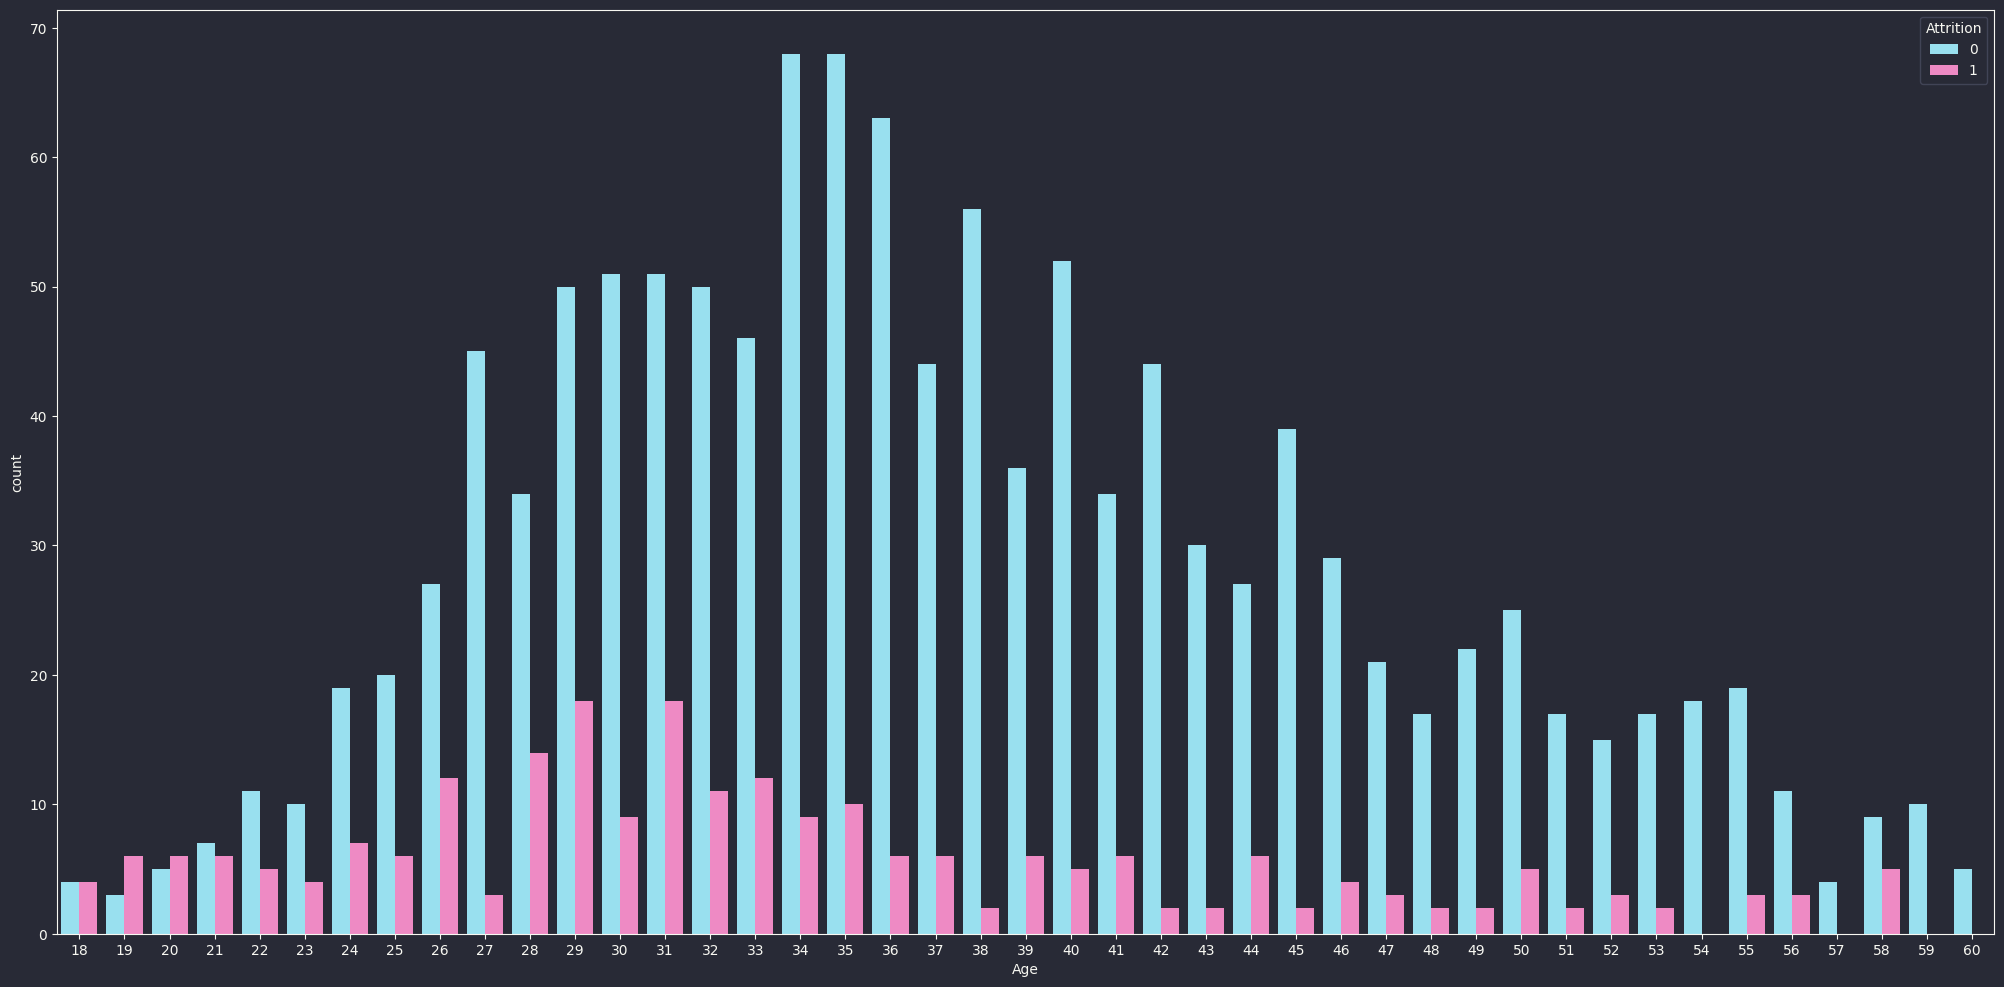

In [25]:
# we can draw a countplot to analyse the Age of the employees 
# the most of the employees who left the company, they were between 29 and 31 years old and the most employees who stayed, they are
# in the range of 34 and 35 years old
plt.figure(figsize = (25, 12))
sns.countplot(x="Age", hue="Attrition", data=data)

<Axes: xlabel='JobLevel', ylabel='count'>

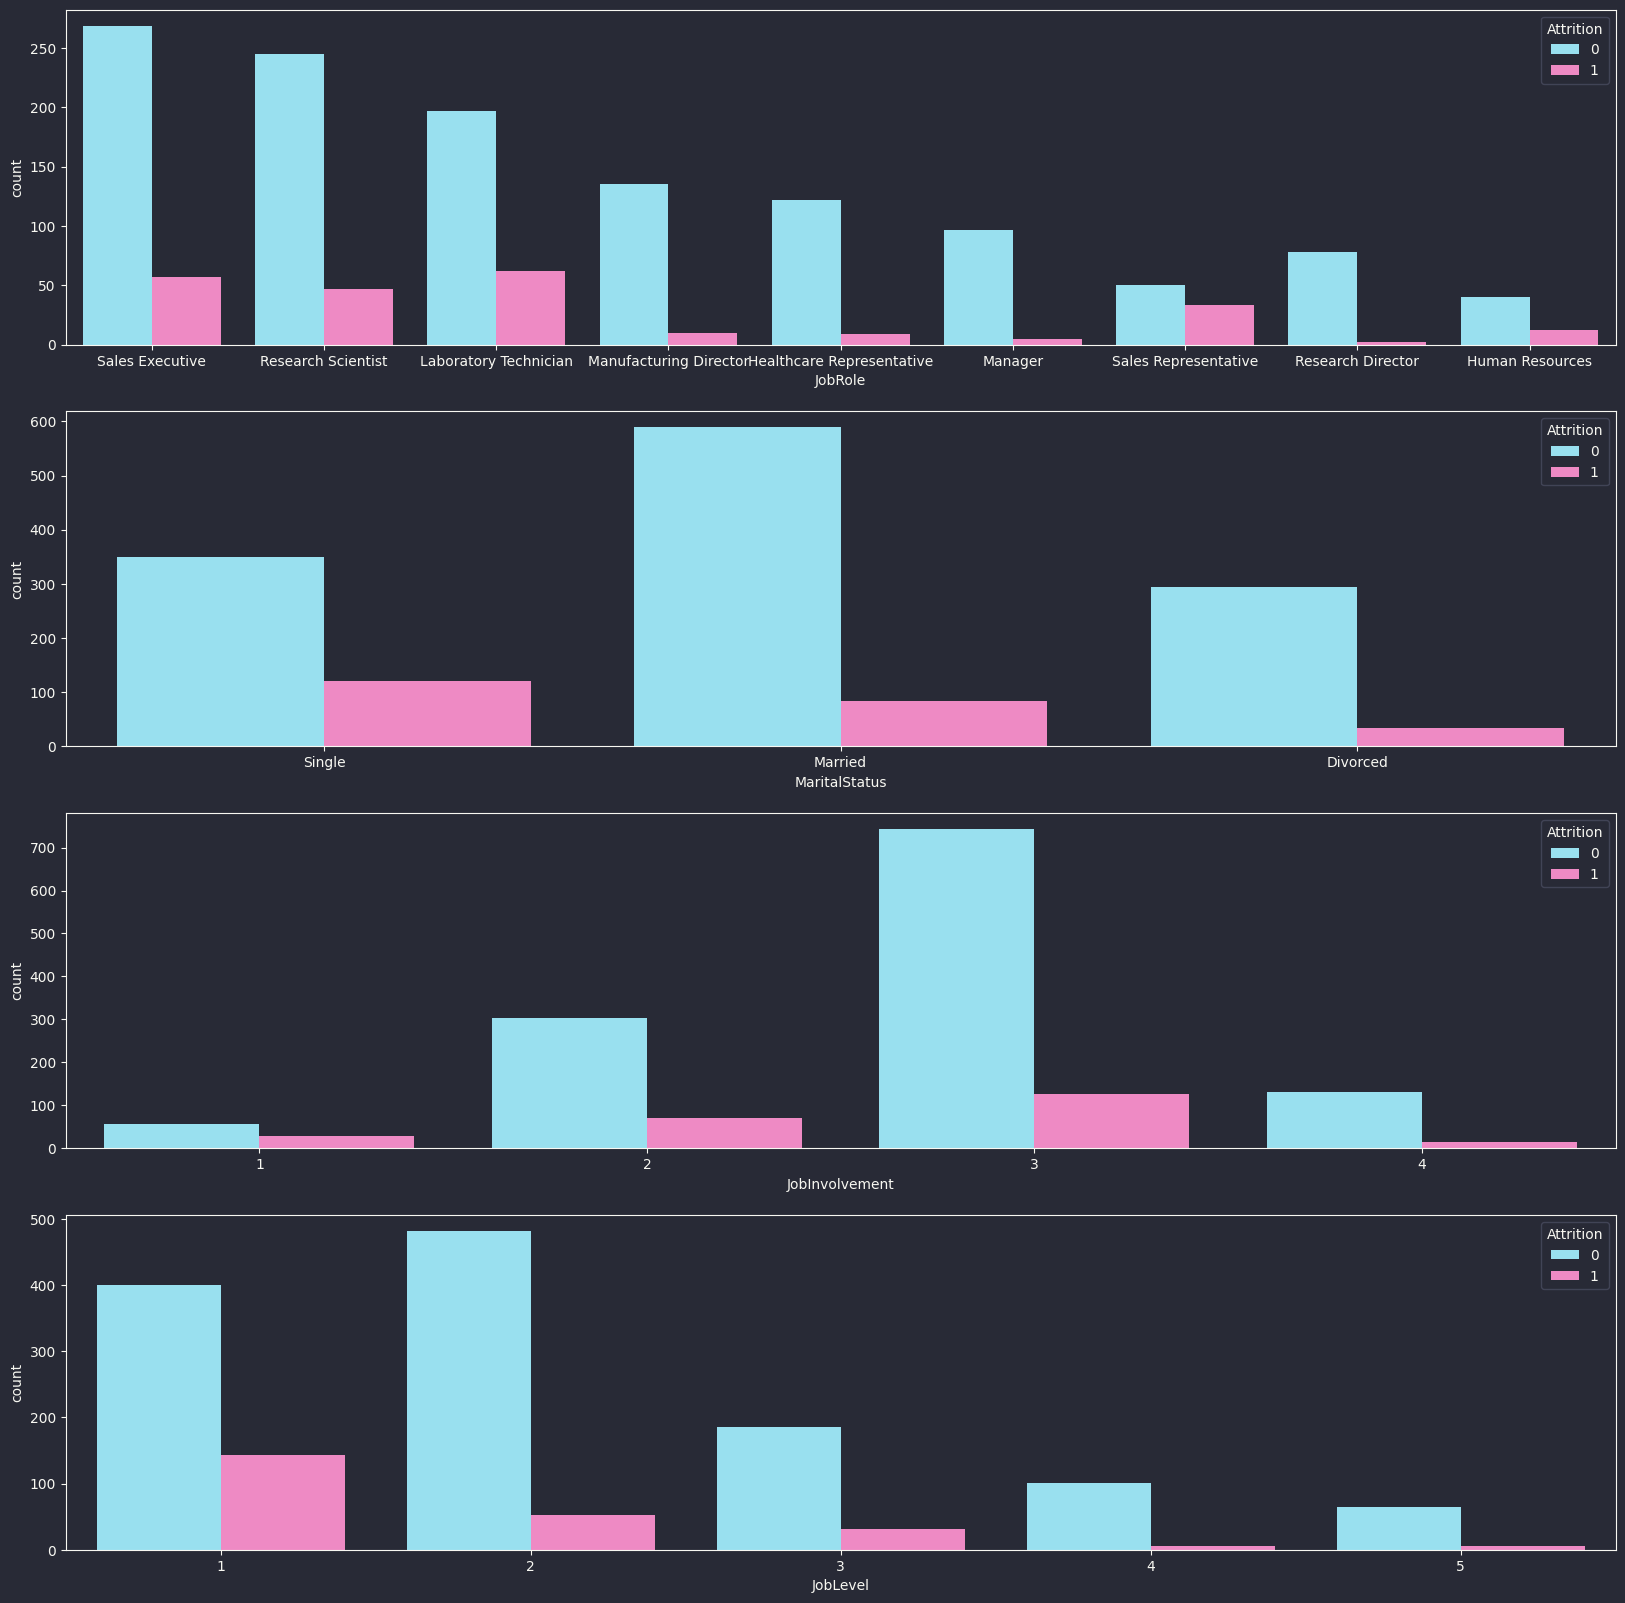

In [26]:
# let's do this analys for another variables
# the Sales Representative Job Role have a very big percentage of employees who left the company, also Labratory Technician and Human Resources
# employees heve a pretty good percentage of the left employees
# as we can see, the employees who are Single has more percentage of quite employees than who Married and who Divorced
# in Job Involment variable, "1" have the most percentage of quite employees than others
# also in Job Level, "1" has the most percentage of employees who left the company, by increasing the Job Level, the percentage of quited 
# employees are decreasing
plt.figure(figsize=(20, 20))

plt.subplot(411)
sns.countplot(x="JobRole", hue="Attrition", data=data)

plt.subplot(412)
sns.countplot(x="MaritalStatus", hue="Attrition", data=data)

plt.subplot(413)
sns.countplot(x="JobInvolvement", hue="Attrition", data=data)

plt.subplot(414)
sns.countplot(x="JobLevel", hue="Attrition", data=data)

In [29]:
# new we have to encode our dataset and convert the string values into numeric values
# we can use the one-hot encoding method, but for now, i encode the data manualy

business_travel_encode = {
    "Travel_Rarely": 1,
    "Travel_Frequently": 2,
    "Non-Travel": 0
}

department_encode = {
    "Sales": 0,
    "Research & Development": 1,
    "Human Resources": 2
}

education_field_encode = {
    "Life Sciences": 1,
    "Medical": 2,
    "Marketing": 3,
    "Technical Degree": 4,
    "Human Resources": 5,
    "Other": 0
}

gender_encode = {
    "Female": 0,
    "Male": 1
}

jobe_role_encode = {
    "Sales Executive": 0,
    "Research Scientist": 1,
    "Laboratory Technician": 2,
    "Manufacturing Director": 3,
    "Healthcare Representative": 4,
    "Manager": 5,
    "Sales Representative": 6,
    "Research Director": 7,
    "Human Resources": 8
}

marital_status_encode = {
    "Single": 0,
    "Married": 1,
    "Divorced": 2
}

over_time_encode = {
    "Yes": 1,
    "No": 0
}

BusinessTravel_encoded = [business_travel_encode[x] for x in data["BusinessTravel"]]
data["BusinessTravel"] = BusinessTravel_encoded

Department_encoded = [department_encode[x] for x in data["Department"]]
data["Department"] = Department_encoded

EducationField_encoded = [education_field_encode[x] for x in data["EducationField"]]
data["EducationField"] = EducationField_encoded

Gender_encoded = [gender_encode[x] for x in data["Gender"]]
data["Gender"] = Gender_encoded

JobRole_encoded = [jobe_role_encode[x] for x in data['JobRole']]
data["JobRole"] = JobRole_encoded

MaritalStatus_encoded = [marital_status_encode[x] for x in data["MaritalStatus"]]
data["MaritalStatus"] = MaritalStatus_encoded

OverTime_encoded = [over_time_encode[x] for x in data["OverTime"]]
data["OverTime"] = OverTime_encoded

<Axes: >

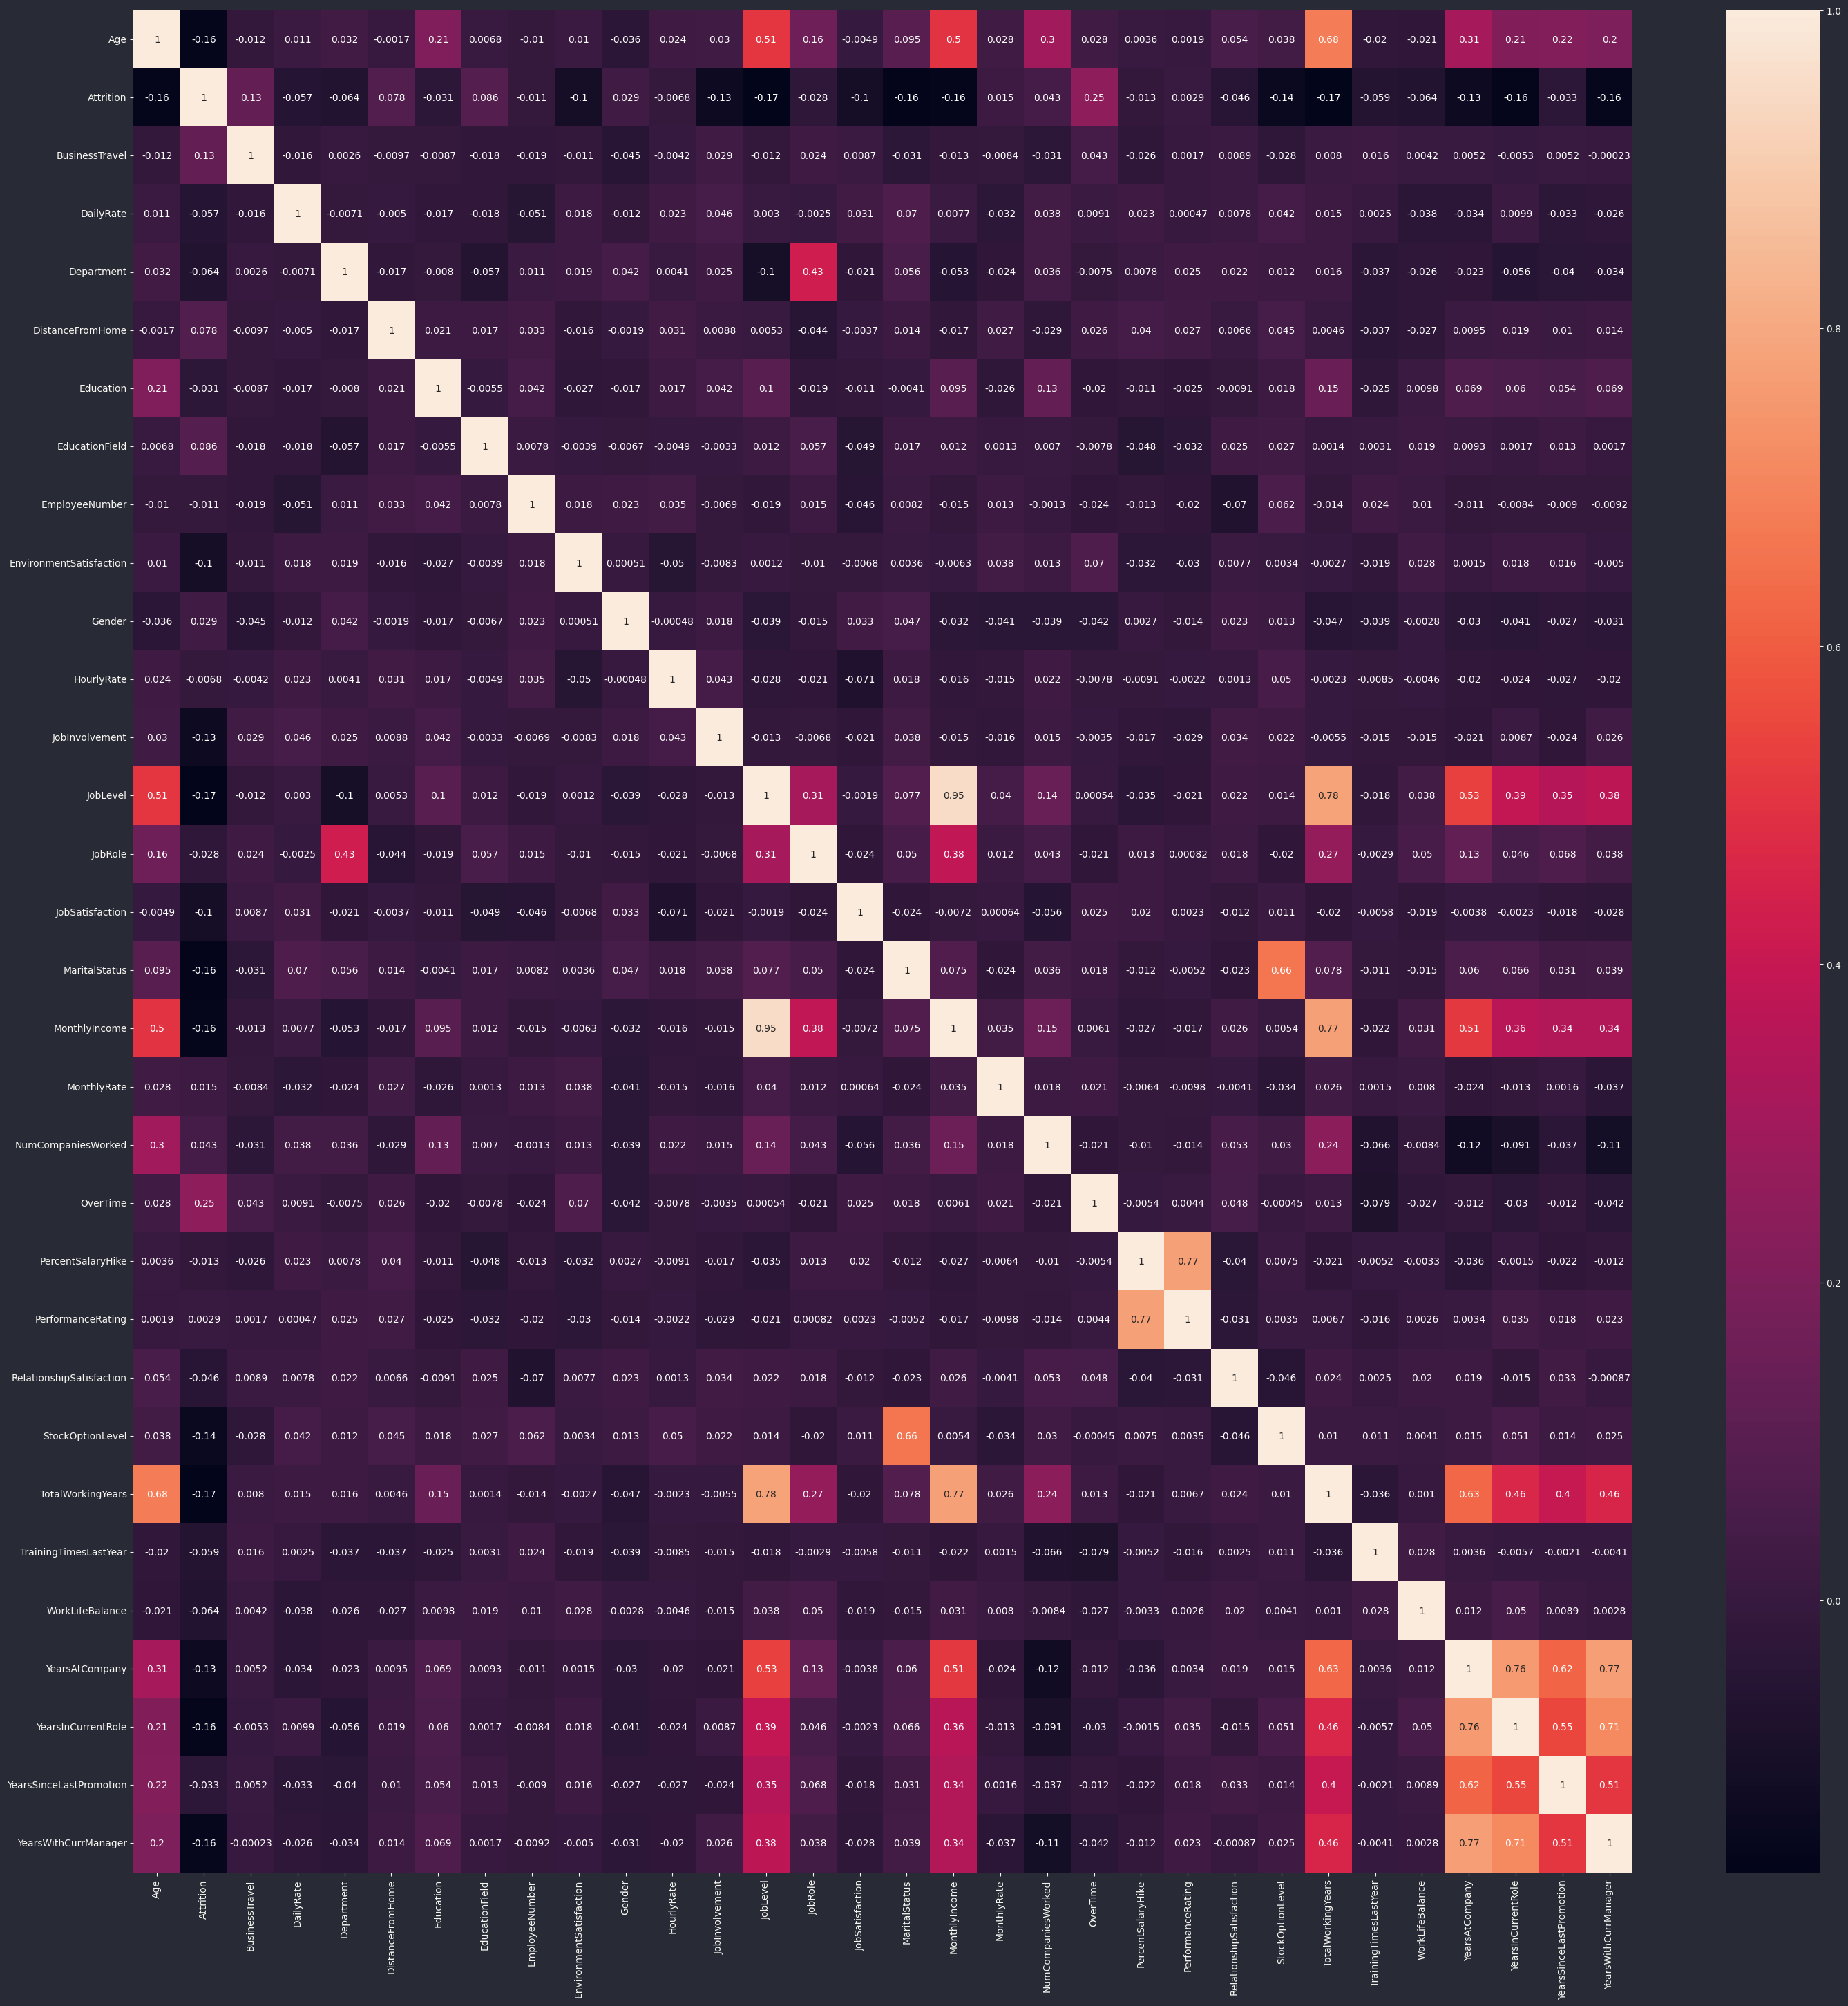

In [30]:
# now, let's check out the correlation between each variables by ploting the correlations into a heatmap
plt.figure(figsize=(35, 35))
sns.heatmap(data.corr(), annot=True)

<Axes: >

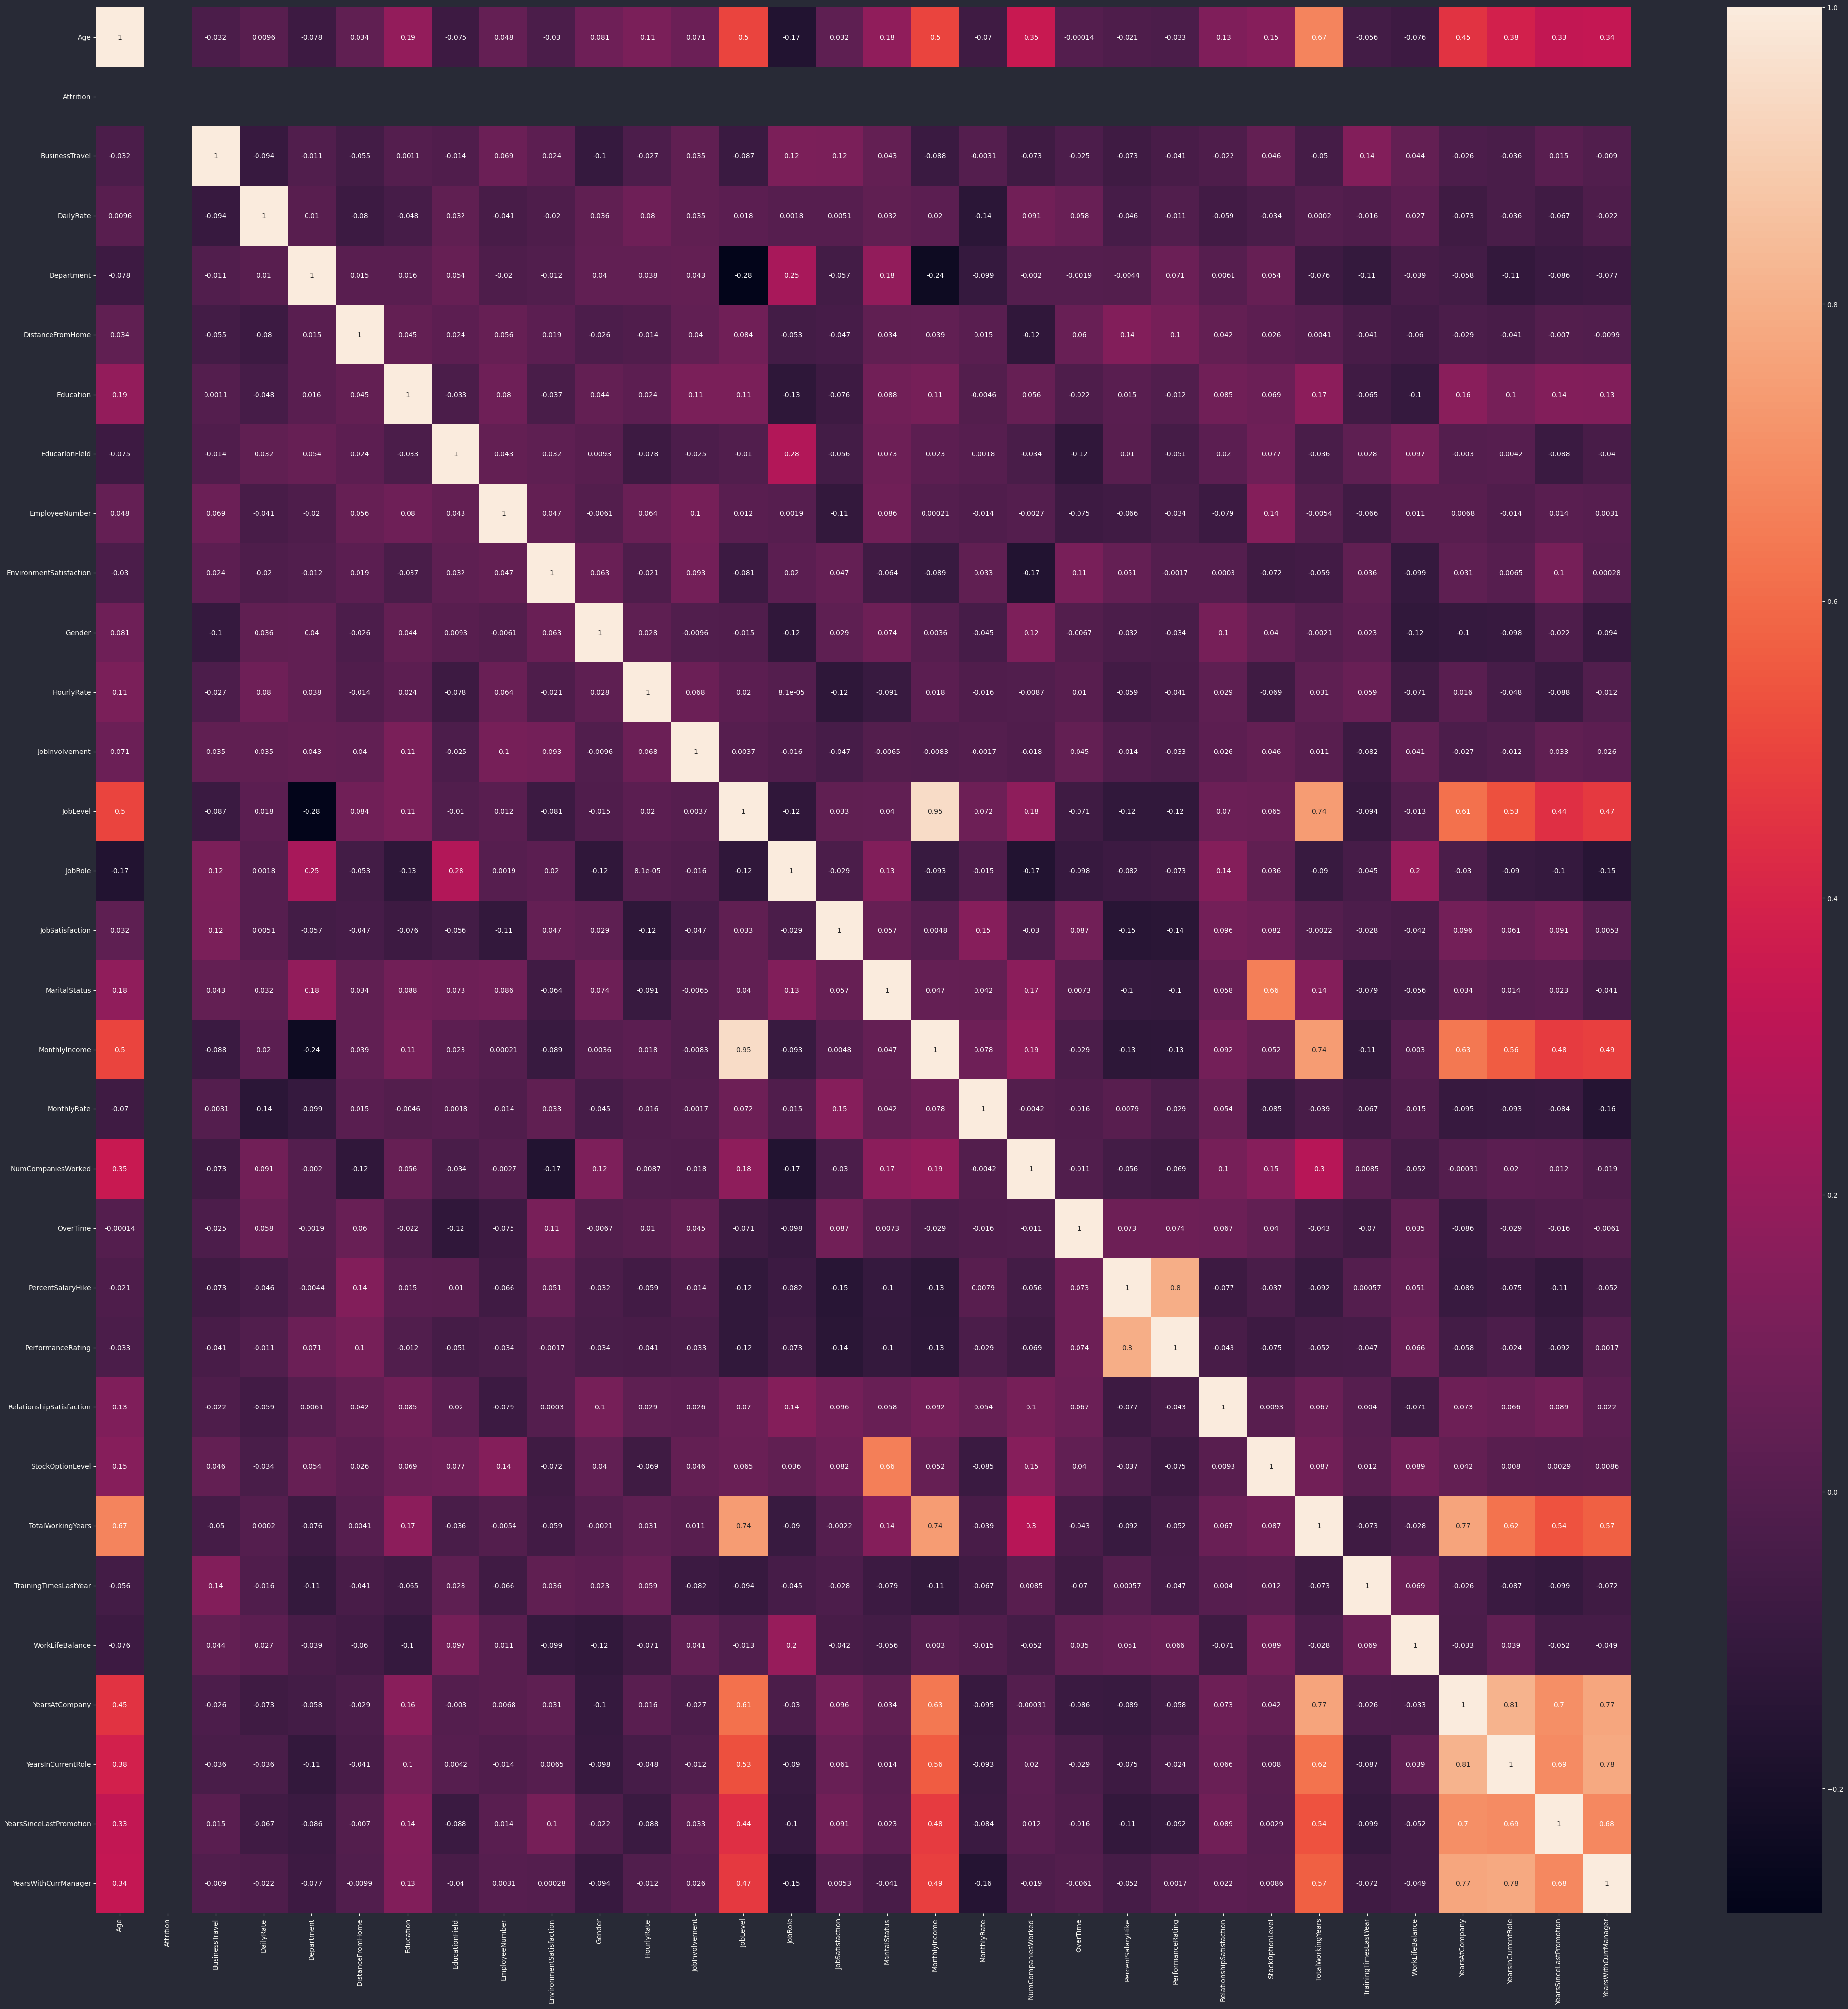

In [31]:
# let's do the same thing for the left_df and stayed_df
left_df = data[data["Attrition"] == 1]
stayed_df = data[data["Attrition"] == 0]

plt.figure(figsize=(50, 50))
sns.heatmap(left_df.corr(), annot=True)

<Axes: >

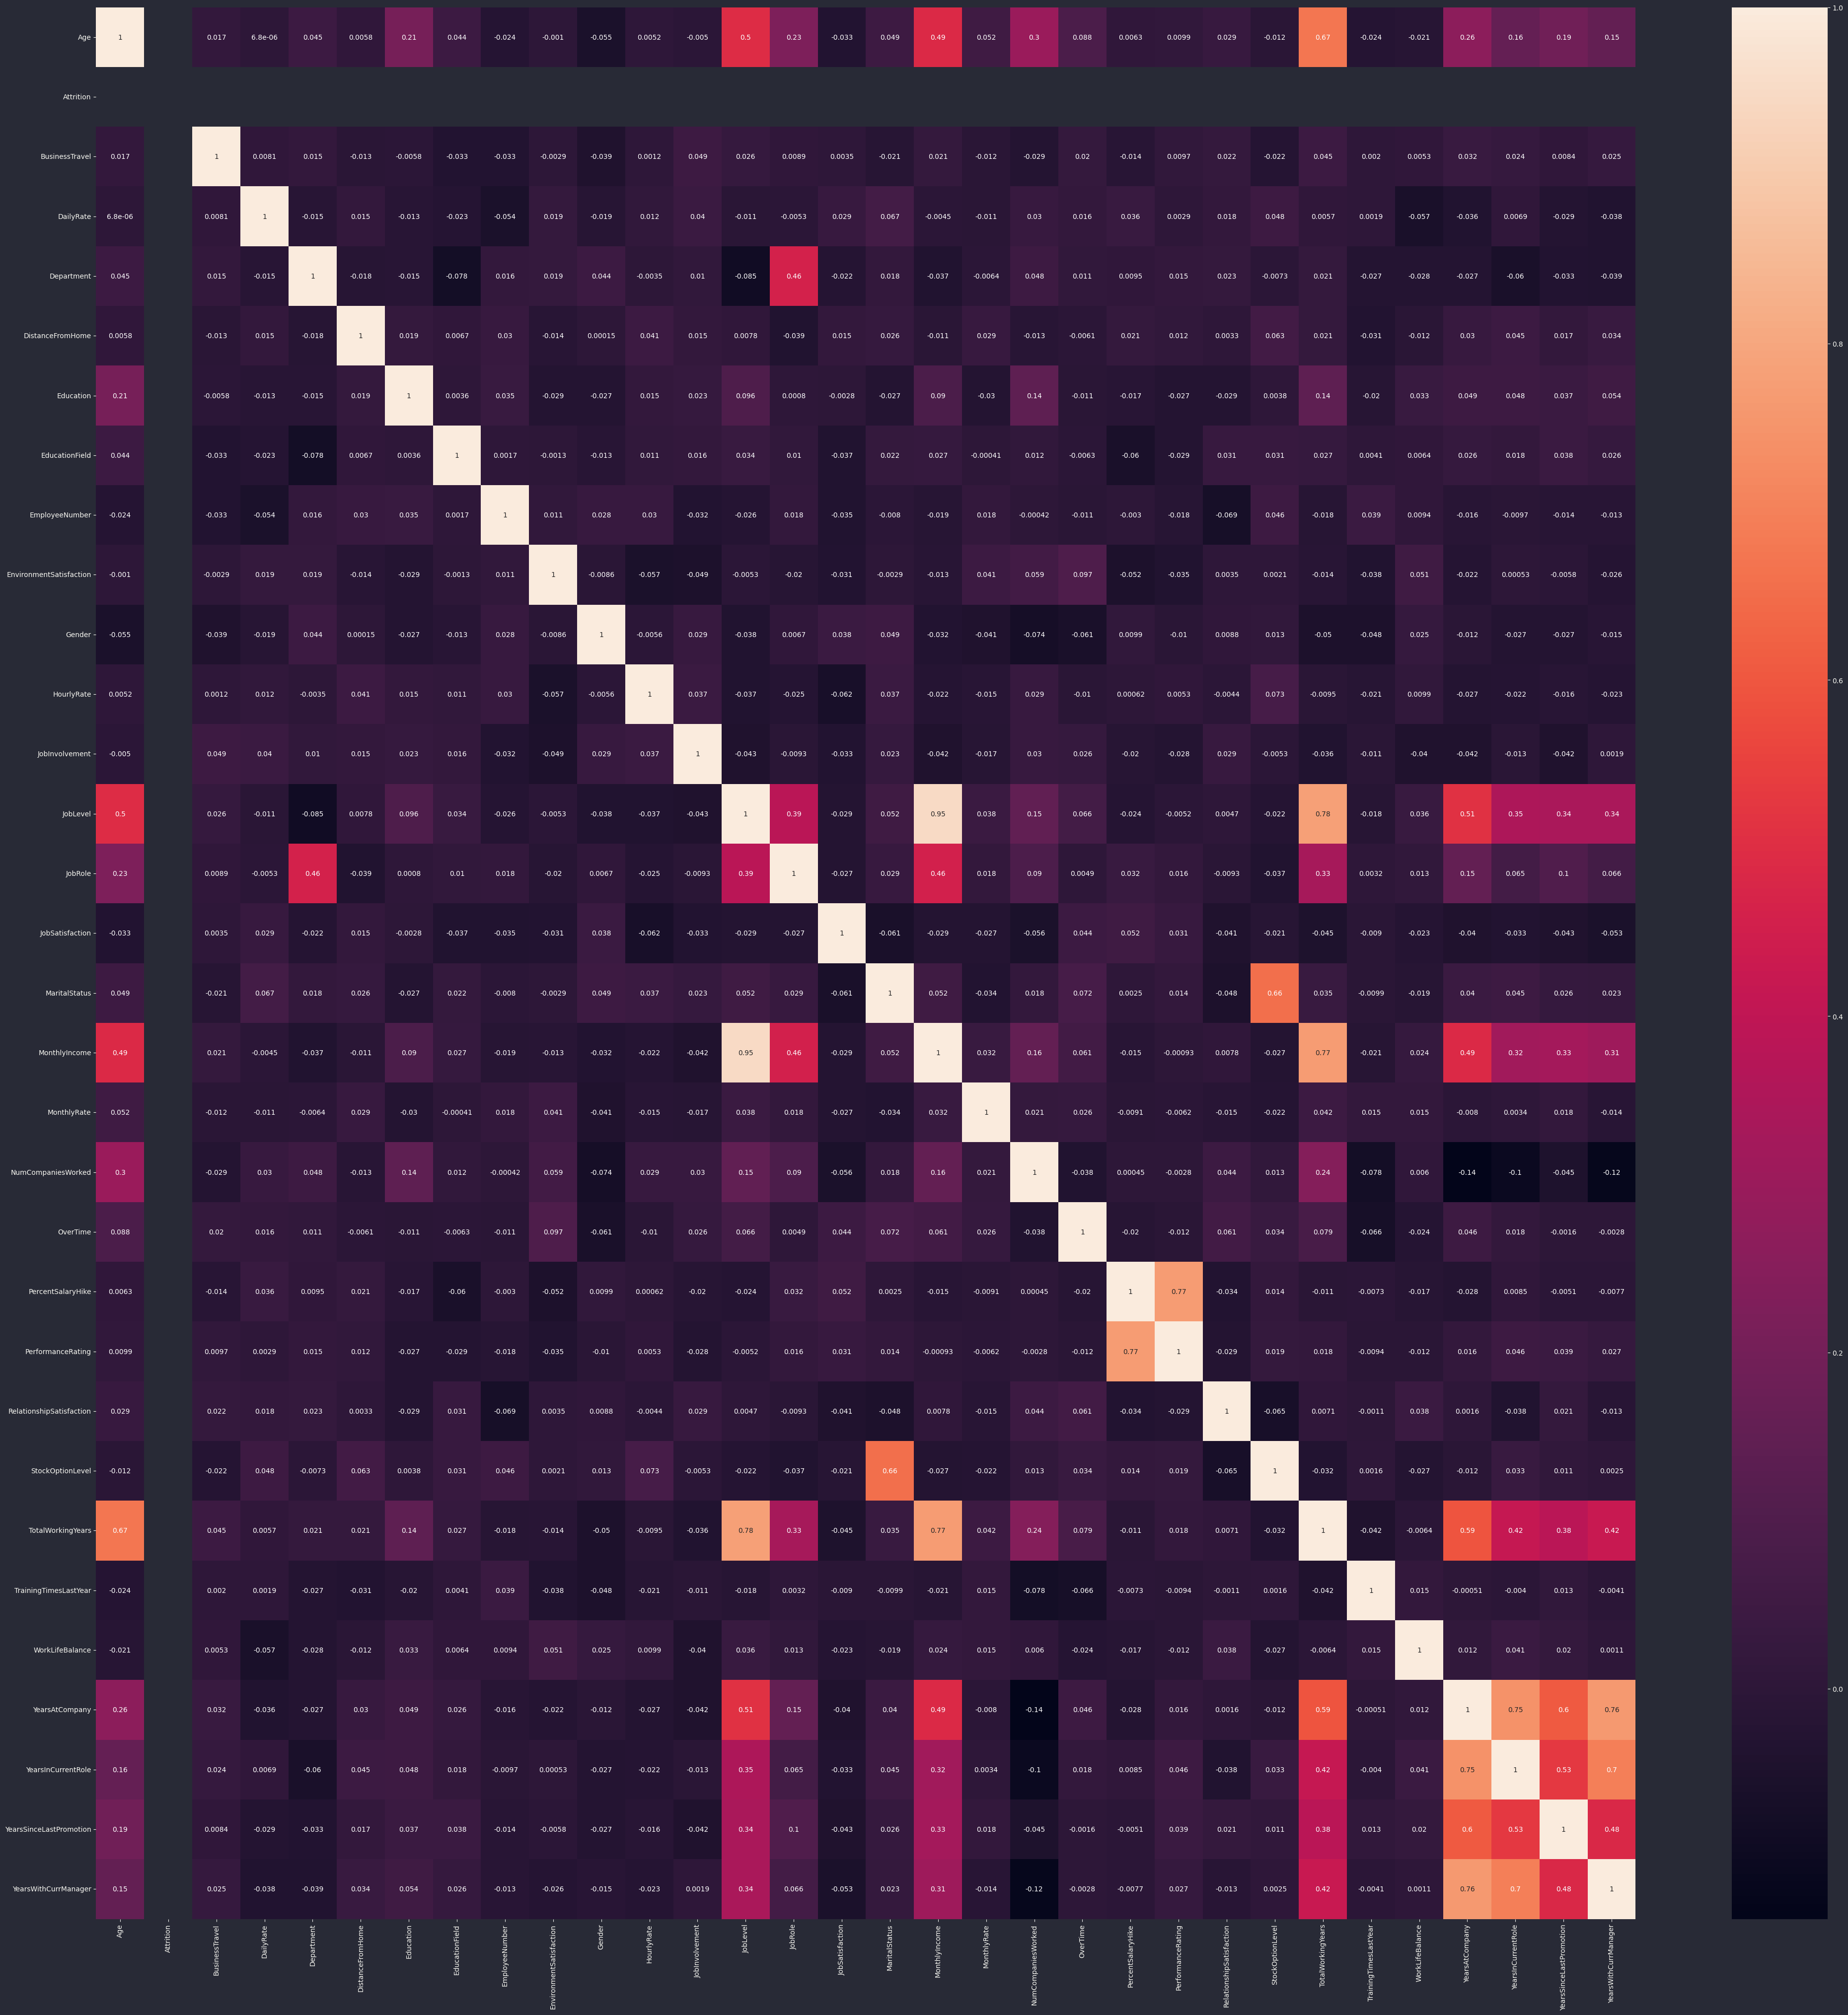

In [34]:
plt.figure(figsize=(50, 50))
sns.heatmap(stayed_df.corr(), annot=True)

Text(0.5, 0, 'Distance From Home')

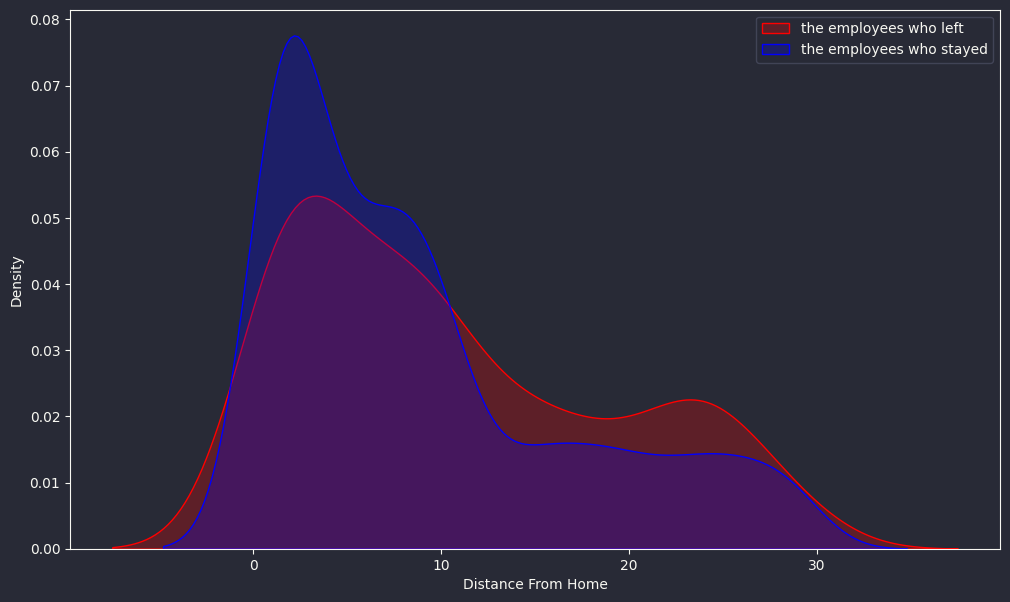

In [32]:
# as we can see, by increasing the Distance From Home, the posibility of quiting the employees from the company is increasing
# after almost 11 Km Distance, the red plot are higher the the blue one
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df["DistanceFromHome"], label="the employees who left", fill=True, color="r")
sns.kdeplot(stayed_df["DistanceFromHome"], label="the employees who stayed", fill=True, color="b")
plt.legend()

plt.xlabel("Distance From Home")

Text(0.5, 0, 'Total Working Years')

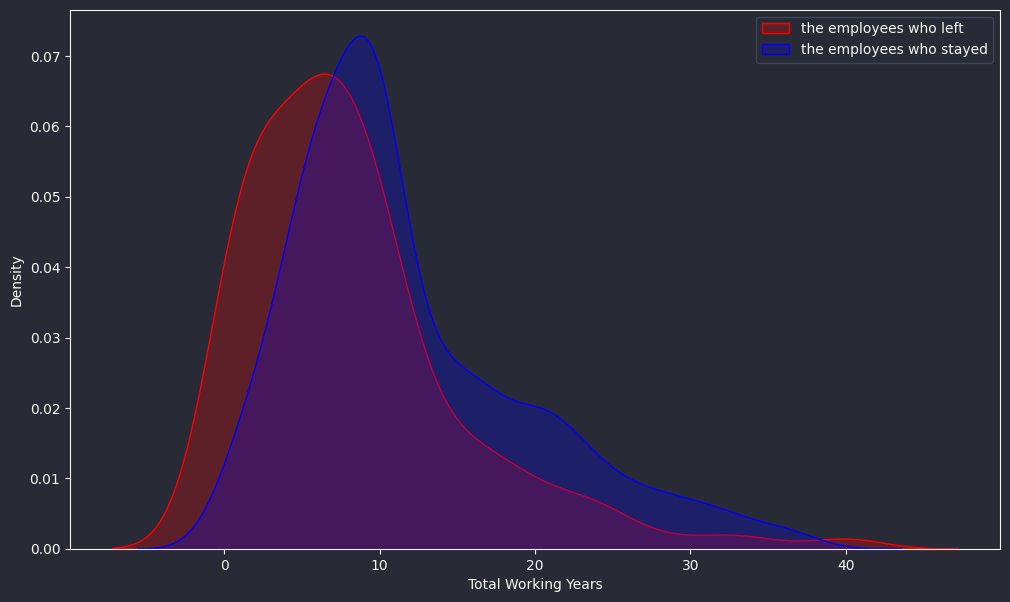

In [33]:
# in this graph, it's abvious by increasing the Total Working Hours, the posibility of staying the employees are increasing
# before 8 years we can see that the red plot th higher than the blue one
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df["TotalWorkingYears"], label="the employees who left", fill=True, color="r")
sns.kdeplot(stayed_df["TotalWorkingYears"], label="the employees who stayed", fill=True, color="b")
plt.legend()

plt.xlabel("Total Working Years")

Text(0.5, 0, 'Years With Current Manager')

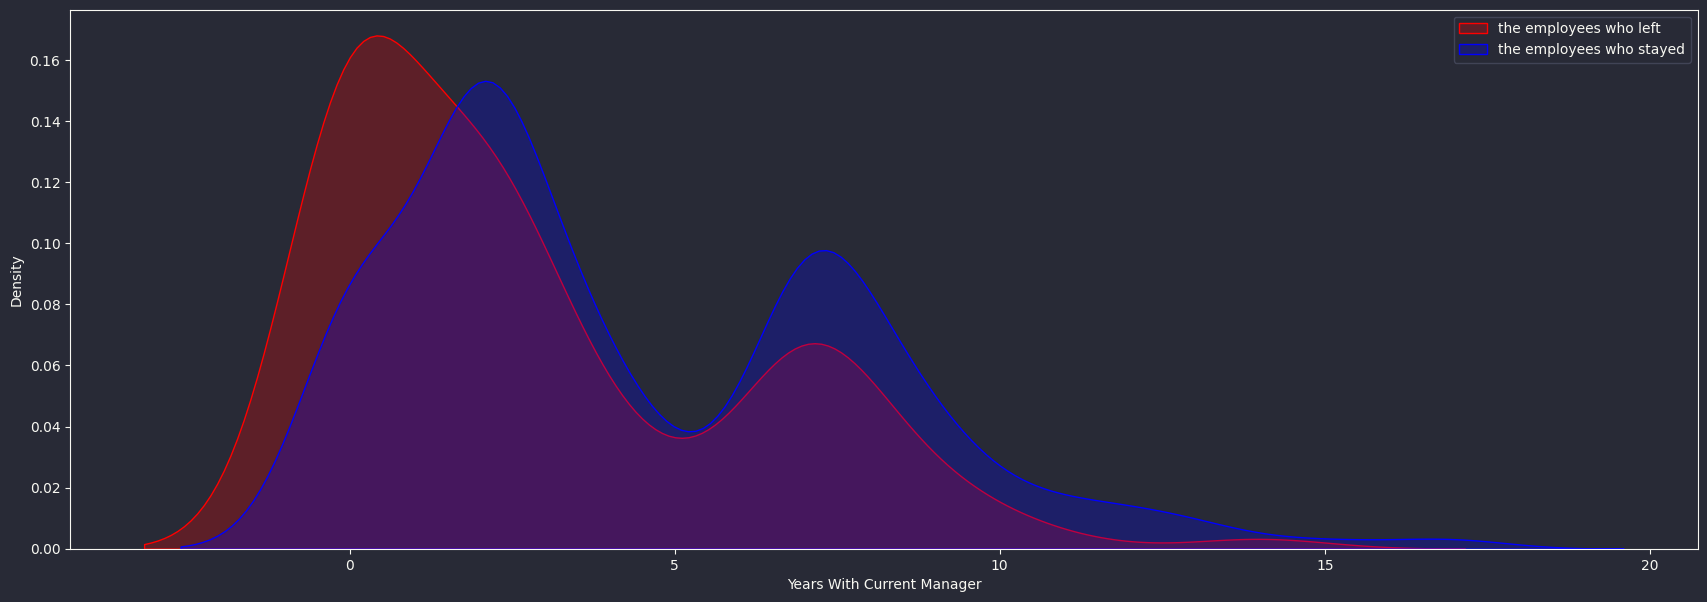

In [34]:
# we can get the same result as we get before, by increasing the Years With Current Manager, we have more employees who stayed in the company
plt.figure(figsize=(21, 7))

sns.kdeplot(left_df["YearsWithCurrManager"], label="the employees who left", fill=True, color="r")
sns.kdeplot(stayed_df["YearsWithCurrManager"], label="the employees who stayed", fill=True, color="b")
plt.legend()

plt.xlabel("Years With Current Manager")

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

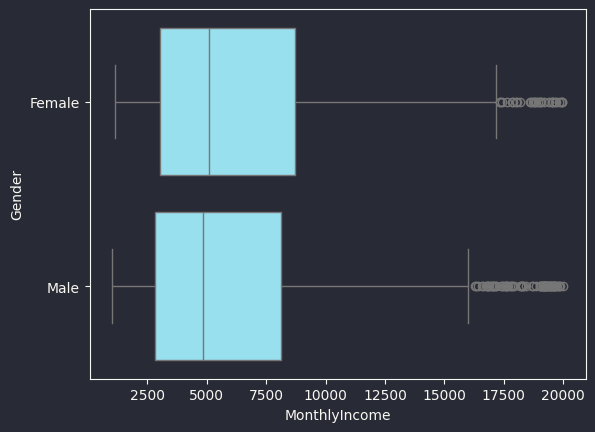

In [27]:
# now we can draw a Box Plot as our next step
# we can see that the average Monthly Income for Female employees and Male employees
# the Monthly Income salary for female employees is a little higher than the male employees

sns.boxplot(x="MonthlyIncome", y="Gender", data=data)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

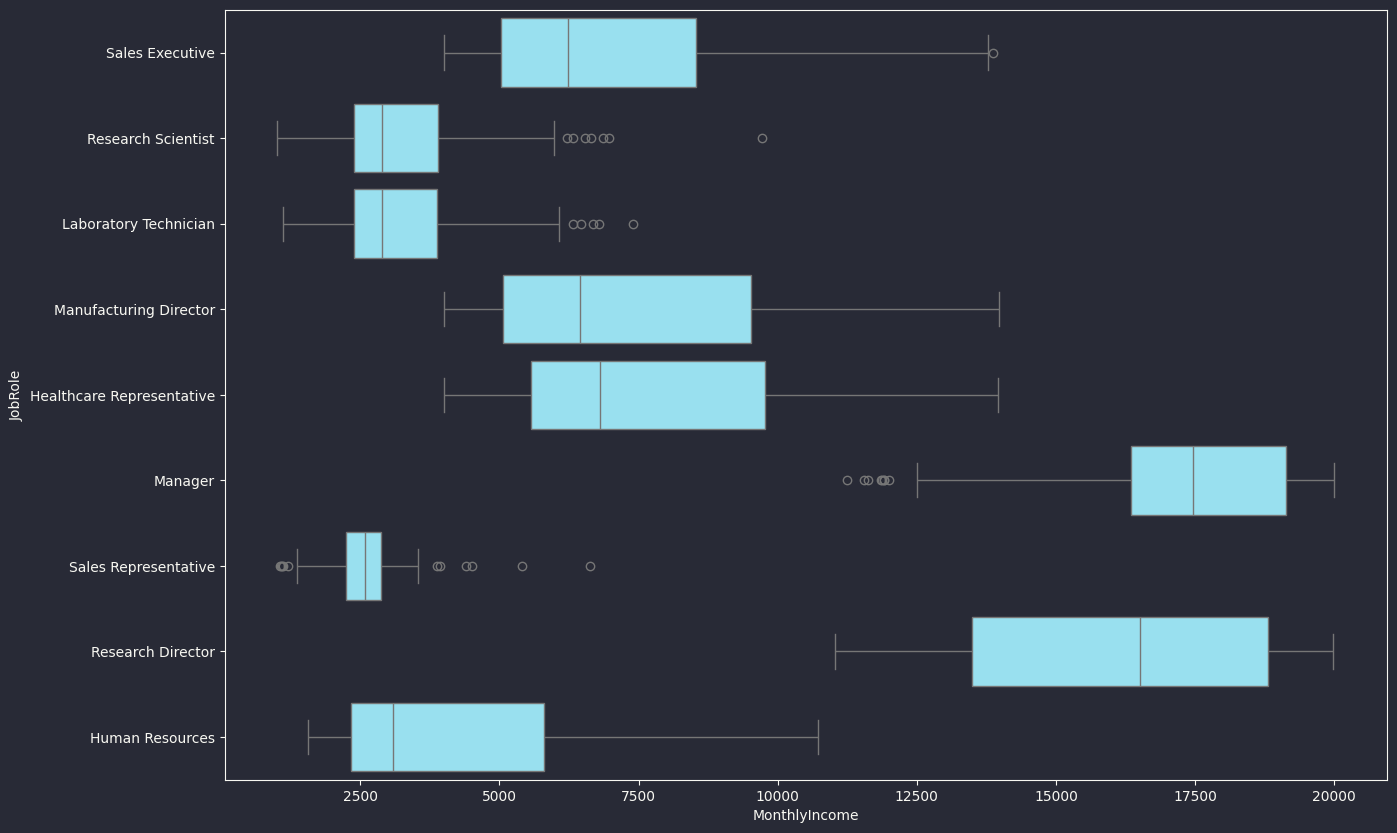

In [28]:
# the Monthly Salary for the Manager and Research Director is higher than every one, that make sense
# as we can notice that, the Sales Representative Salary is less than every one, it can explain why we have the most quite percentage
# in this Job Rol
plt.figure(figsize=(15, 10))
sns.boxplot(x="MonthlyIncome", y="JobRole", data=data)

# Data Cleaning

In [35]:
# we can normalize our data by MinMaxScaler algorithm easly
# but before that, we have to seperate our dataset into input and output data
from sklearn.preprocessing import MinMaxScaler

X = data.drop(["Attrition"], axis=1)
y = data["Attrition"]

In [36]:
X.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               1       1102           0                 1          2   
1   49               2        279           1                 8          1   
2   37               1       1373           1                 2          2   
3   33               2       1392           1                 3          4   
4   27               1        591           1                 2          1   

   EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  ...  \
0               1               1                        2       0  ...   
1               1               2                        3       1  ...   
2               0               4                        4       1  ...   
3               1               5                        4       0  ...   
4               2               7                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [38]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Building machine learning and neural network models

In [39]:
# now it's time for build our learning models and train them, in here, i use Logistic Regression, Random Forest adn neural network
# let's start with logistic regression
# at first, we have to split our data again into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

print(f"Accuracy of logistic regression is : {accuracy_score(y_pred, y_test)}")

Accuracy of logistic regression is : 0.8934240362811792


2023-12-08 17:20:51.069777: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-08 17:20:51.070389: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


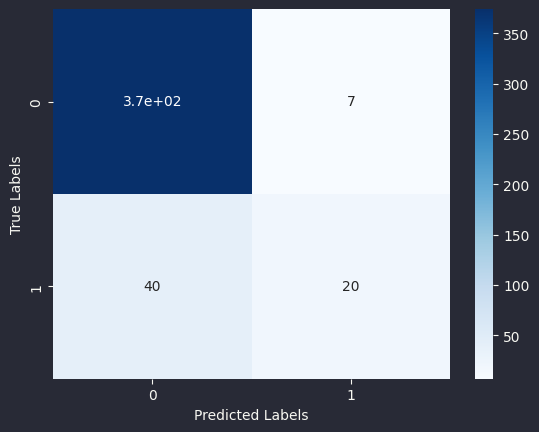

In [44]:
# Becouse of our imbalanced Attrition classes, the Accuracy Score not a good metric to evaluate our model
# so we can just use, precision, recall and f1 score to evaluate our model
# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [45]:
from prettytable import PrettyTable

confusion_matrix = PrettyTable(['metrices', 'values'])

# To insert rows:
confusion_matrix.add_row(['Precision', sklearn.metrics.precision_score(y_test, y_pred, average='weighted')])
confusion_matrix.add_row(['Recall', sklearn.metrics.recall_score(y_test, y_pred, average='weighted')])
confusion_matrix.add_row(['f1_score', sklearn.metrics.f1_score(y_test, y_pred, average='weighted')])

print(confusion_matrix)

+-----------+--------------------+
|  metrices |       values       |
+-----------+--------------------+
| Precision | 0.881253628665637  |
|   Recall  | 0.8934240362811792 |
|  f1_score | 0.8754233074708956 |
+-----------+--------------------+


In [46]:
# Now it'r turn for random forest classifier
from sklearn.ensemble import RandomForestClassifier

RForest = RandomForestClassifier()
RForest.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = RForest.predict(X_test)

In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
print(f"Accuracy of logistic regression is : {accuracy_score(y_pred, y_test)}")

Accuracy of logistic regression is : 0.8843537414965986


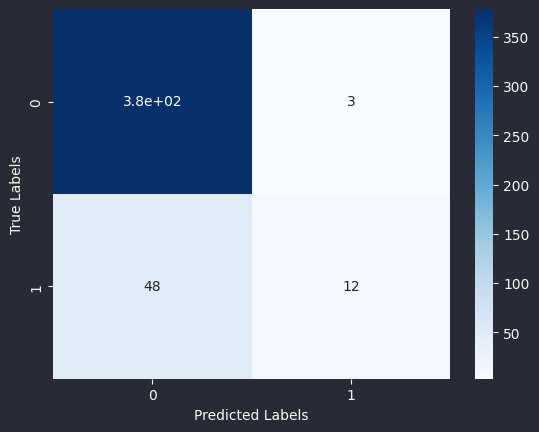

In [50]:
# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [51]:
# as we can see, we have a better result for logistic regression
confusion_matrix = PrettyTable(['metrices', 'values'])

# To insert rows:
confusion_matrix.add_row(['Precision', sklearn.metrics.precision_score(y_test, y_pred, average='weighted')])
confusion_matrix.add_row(['Recall', sklearn.metrics.recall_score(y_test, y_pred, average='weighted')])
confusion_matrix.add_row(['f1_score', sklearn.metrics.f1_score(y_test, y_pred, average='weighted')])

print(confusion_matrix)

+-----------+--------------------+
|  metrices |       values       |
+-----------+--------------------+
| Precision | 0.8754431350004791 |
|   Recall  | 0.8843537414965986 |
|  f1_score | 0.8528842020079407 |
+-----------+--------------------+


# Neural Network

In [52]:
# Now it's time for build our neural network

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=(31, )),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [53]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [54]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=50, shuffle=True)

Epoch 1/100
21/21 [==============================] - 1s 4ms/step - loss: 0.4536 - accuracy: 0.8134
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8455
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 0.3319 - accuracy: 0.8678
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 0.3146 - accuracy: 0.8776
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.2886 - accuracy: 0.8912
Epoch 6/100
21/21 [==============================] - 0s 10ms/step - loss: 0.2521 - accuracy: 0.9125
Epoch 7/100
21/21 [==============================] - 0s 9ms/step - loss: 0.2087 - accuracy: 0.9329
Epoch 8/100
21/21 [==============================] - 0s 8ms/step - loss: 0.1980 - accuracy: 0.9329
Epoch 9/100
21/21 [==============================] - 0s 10ms/step - loss: 0.1552 - accuracy: 0.9456
Epoch 10/100
21/21 [==============================] - 0s 11ms/step - loss: 0.1834 - accuracy: 0.9300
Epoch 

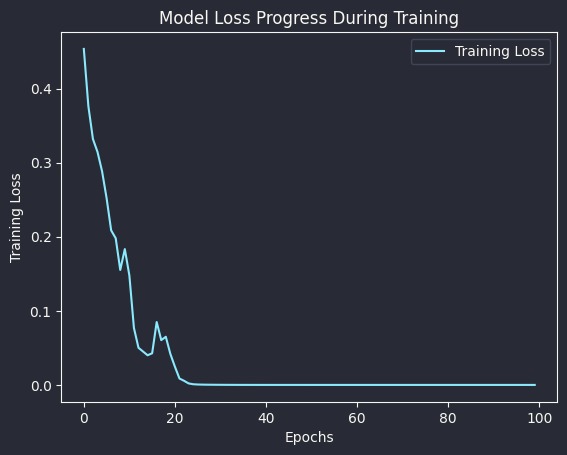

In [57]:
plt.plot(hist.history["loss"])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])

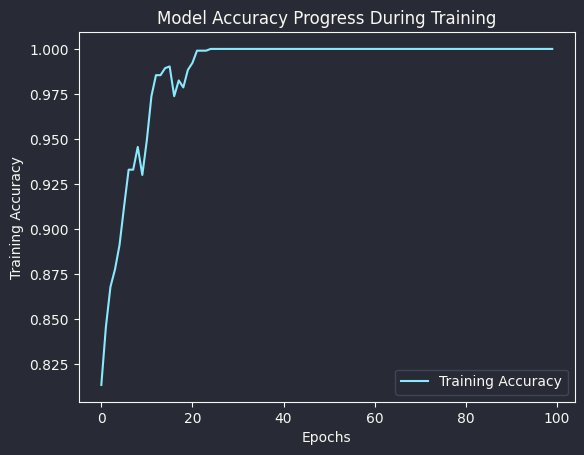

In [59]:
plt.plot(hist.history["accuracy"])
plt.title("Model Accuracy Progress During Training")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.legend(["Training Accuracy"])

In [60]:
y_pred = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


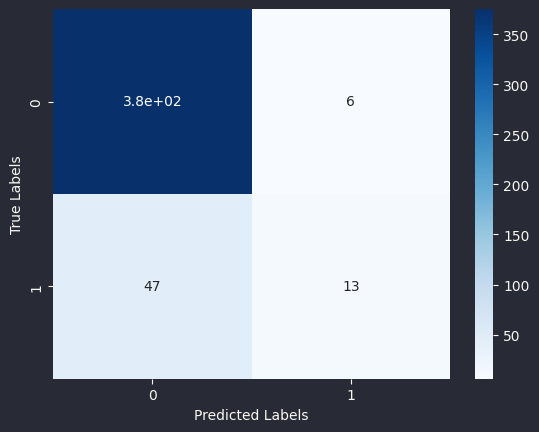

In [61]:
# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()